In [ ]:
# pip install llama_index
# pip install llama-index-embeddings-huggingface ##用于tokenembeding

#### Index_guide
Type of index  
-Summary(chunk store in a list: index. SummaryIndex)  
-TreeIndes(tree-structured index: TreeIndex)  
-Vector(Vector Store Index: VectorStoreIndex)  
-Knowledge graph(Knowledge Graph Index: KnowledgeGraphIndex)

### 1.Using VectorStoreIndex

In [ ]:
## 在indexing之前，要设置embedding模型
## llama_index提供了多种embedding方法，包括多模态

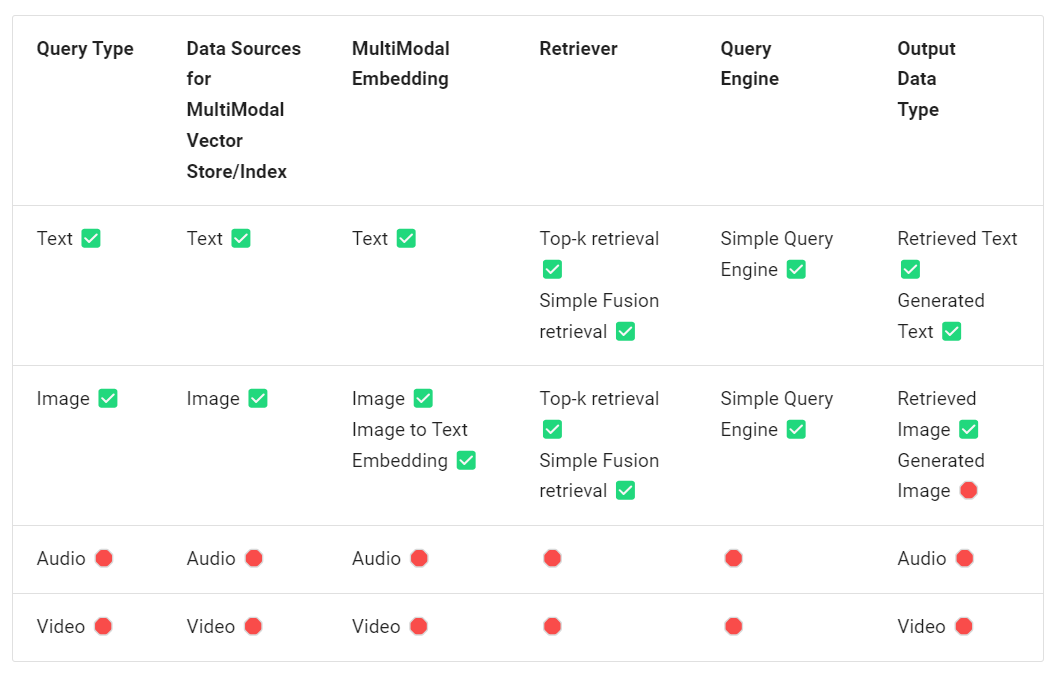

In [17]:
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.core import Settings
from llama_index.core import Document
##setting函数可以定义全局的model，chunk_size(注意！老版本使用的是content_serve!)
##https://docs.llamaindex.ai/en/stable/module_guides/models/embeddings/ (请参考)
Settings.embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### 1.1从document创建index

In [18]:
document1 = Document(
    text="This is a super-customized document",
    metadata={
        "file_name": "super_secret_document.txt",
        "category": "finance",
        "author": "LlamaIndex"})
document2 = Document(
    text="Hello world!",
    metadata={
        "file_name": "computersss.txt",
        "category": "RAG",
        "author": "Human"})
##或者这样写，把多个document用[.. , ..]连接
document = [document1, document2]
document

[Document(id_='d76461cc-a338-4e59-b98f-3b6adafd8948', embedding=None, metadata={'file_name': 'super_secret_document.txt', 'category': 'finance', 'author': 'LlamaIndex'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='This is a super-customized document', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n'),
 Document(id_='ff2d2dde-55b1-44f1-9401-d823781cbed6', embedding=None, metadata={'file_name': 'computersss.txt', 'category': 'RAG', 'author': 'Human'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='Hello world!', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n')]

In [20]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
## Vector Store is to load a set of documents and build an index
# Load documents and build index
# documents = SimpleDirectoryReader(
#     "../../examples/data/paul_graham"
# ).load_data()
##show_progress=True可以定义显示进度
index = VectorStoreIndex.from_documents(document, show_progress=True)

Parsing nodes:   0%|          | 0/2 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/2 [00:00<?, ?it/s]

In [23]:
index

### 1.2从nodes创建index

In [46]:
text='\nContext\nLLMs are a phenomenal piece of technology for knowledge generation and reasoning.\nThey are pre-trained on large amounts of publicly available data.\nHow do we best augment LLMs with our own private data?\nWe need a comprehensive toolkit to help perform this data augmentation for LLMs.\n\nProposed Solution\nThat\'s where LlamaIndex comes in. LlamaIndex is a "data framework" to help\nyou build LLM  apps. It provides the following tools:\n\nOffers data connectors to ingest your existing data sources and data formats\n(APIs, PDFs, docs, SQL, etc.)\nProvides ways to structure your data (indices, graphs) so that this data can be\neasily used with LLMs.\nProvides an advanced retrieval/query interface over your data:\nFeed in any LLM input prompt, get back retrieved context and knowledge-augmented output.\nAllows easy integrations with your outer application framework\n(e.g. with LangChain, Flask, Docker, ChatGPT, anything else).\nLlamaIndex provides tools for both beginner users and advanced users.\nOur high-level API allows beginner users to use LlamaIndex to ingest and\nquery their data in 5 lines of code. Our lower-level APIs allow advanced users to\ncustomize and extend any module (data connectors, indices, retrievers, query engines,\nreranking modules), to fit their needs.\n'

In [47]:
from llama_index.core.node_parser import SentenceSplitter
node_parser = SentenceSplitter(chunk_size=200, chunk_overlap=20)
nodes = node_parser.get_nodes_from_documents([Document(text=text,metadata={"filename":"bbb","categery":"kkk"})], show_progress=False)
nodes

[TextNode(id_='6bc794ac-92fb-405c-b349-937e3ad2d91b', embedding=None, metadata={'filename': 'bbb', 'categery': 'kkk'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='00bd068a-8073-439c-8058-295eed3b50f4', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'filename': 'bbb', 'categery': 'kkk'}, hash='edf487fd1b23742386da2062ee4659ce003e58bf03d2f92904df91fc9173234c'), <NodeRelationship.NEXT: '3'>: RelatedNodeInfo(node_id='1d69e49e-48b8-4ba4-95f7-c441a07f8117', node_type=<ObjectType.TEXT: '1'>, metadata={}, hash='6634fe1a5cec75f4cd8570269432fd443b5258b4c2128b0f53f5e696a5d4cb7e')}, text='Context\nLLMs are a phenomenal piece of technology for knowledge generation and reasoning.\nThey are pre-trained on large amounts of publicly available data.\nHow do we best augment LLMs with our own private data?\nWe need a comprehensive toolkit to help perform this data augmentation for LLMs.\n\nProposed Solution\nThat\

In [48]:
index = VectorStoreIndex(nodes, show_progress=True)
index

Generating embeddings:   0%|          | 0/2 [00:00<?, ?it/s]

In [49]:
index.index_struct

IndexDict(index_id='dd753f5f-44a3-4041-9f93-1c0c193f6776', summary=None, nodes_dict={'6bc794ac-92fb-405c-b349-937e3ad2d91b': '6bc794ac-92fb-405c-b349-937e3ad2d91b', '1d69e49e-48b8-4ba4-95f7-c441a07f8117': '1d69e49e-48b8-4ba4-95f7-c441a07f8117'}, doc_id_dict={}, embeddings_dict={})

## 2.Document Management

In [ ]:
##Most LlamaIndex index structures allow for insertion, deletion, update, and refresh operations.

### 2.1 insertation

In [ ]:
##You can "insert" a new "Document"(broken down into nodes)
##into any index data structure.

In [66]:
from llama_index.core import SummaryIndex, Document

index = SummaryIndex([])
text_chunks = ["text_chunk_1", "text_chunk_2", "text_chunk_3"]

doc_chunks = []
for i, text in enumerate(text_chunks):
    doc = Document(text=text, id_=f"doc_id_{i}")
    doc_chunks.append(doc)

##使用insert方法将document插入进去
##这里的document会自动【into nodes】
##insert()默认是doc,insert_nodes()添加节点
##https://docs.llamaindex.ai/en/stable/api_reference/indices/
for doc_chunk in doc_chunks:
    index.insert(doc_chunk)

In [67]:
doc_chunks

[Document(id_='doc_id_0', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='text_chunk_1', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n'),
 Document(id_='doc_id_1', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='text_chunk_2', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n'),
 Document(id_='doc_id_2', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='text_chunk_3', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n')]

### 2.2 delete

In [53]:
##delete方法有两种
##.delete_nodes()和.delete_ref_doc()
index.delete_ref_doc("doc_id_0", delete_from_docstore=True)

In [54]:
index.index_struct

IndexList(index_id='e4fe8b1c-d2a6-41af-849b-c0d4690d659a', summary=None, nodes=['0f311248-50ee-4935-9740-ce1bc2df4f0e', '29cb61d6-c433-4cb2-889a-5e3888e6bf8f'])

### 2.3 update

In [57]:
# NOTE: the document has a `doc_id` specified
doc_chunks[1].text = "Brand new document text"
index.update_ref_doc(
    doc_chunks[0],
    update_kwargs={"delete_kwargs": {"delete_from_docstore": True}}, ##optional
)

In [58]:
index.index_struct

IndexList(index_id='e4fe8b1c-d2a6-41af-849b-c0d4690d659a', summary=None, nodes=['0f311248-50ee-4935-9740-ce1bc2df4f0e', '29cb61d6-c433-4cb2-889a-5e3888e6bf8f', '62d9c7ad-7bd6-4e5e-b087-aa7c9b6c46ad'])

### 2.4 refresh

In [68]:
## automatically refresh the index
# modify first document, with the same doc_id
doc_chunks[0] = Document(text="Super new document text", id_="doc_id_0")

# add a new document，使用append方法
doc_chunks.append(Document(
        text="This isn't in the index yet, but it will be soon!",
        id_="doc_id_3",))

# refresh the index
refreshed_docs = index.refresh_ref_docs(
    doc_chunks
)

# refreshed_docs[0] and refreshed_docs[-1] should be true

In [69]:
doc_chunks

[Document(id_='doc_id_0', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='Super new document text', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n'),
 Document(id_='doc_id_1', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='text_chunk_2', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n'),
 Document(id_='doc_id_2', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='text_chunk_3', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n'),
 Document(id_='doc_id_3', embedding=None, metadata={}, excluded_embed_meta

In [65]:
print(refreshed_docs)

[True, False, False, True, False]


### 2.5 Document Tracking

In [72]:
print(index.ref_doc_info)

{'doc_id_1': RefDocInfo(node_ids=['ae71f733-a713-49f4-8158-5d3ac935711e'], metadata={}), 'doc_id_2': RefDocInfo(node_ids=['07162ff4-f352-4e8f-a91b-f14c303dcb2f'], metadata={}), 'doc_id_0': RefDocInfo(node_ids=['f862ac05-2cae-4f3e-980c-e3a88f9ca5fe'], metadata={}), 'doc_id_3': RefDocInfo(node_ids=['31c219ff-e221-471e-9139-286720e23ee2'], metadata={})}
